In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


importing the training set

In [5]:
dataset_train= pd.read_csv('Google_Stock_Price_Train.csv')

In [6]:
training_set= dataset_train.iloc[:,1:2].values

In [9]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [10]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


feature selection


In [11]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)


In [15]:
training_set_scaled


array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [27]:
X_train = []
y_train= []
for i in range(60,len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train), np.array(y_train)  

In [28]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [29]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

reshaping


In [30]:
X_train=np.reshape(X_train ,(X_train.shape[0], X_train.shape[1],1))

In [31]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [32]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [33]:
# initilaze the RNN
regressor = Sequential() 

In [40]:
# adding a first lstm layer and some dropout layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [41]:
# adding a second  lstm layer and some dropout layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [42]:
# adding a third  lstm layer and some dropout layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [44]:
# adding a fourth  lstm layer and some dropout layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [45]:
#adding the output layer
regressor.add(Dense(units = 1))


In [46]:
#compling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [59]:
#fitting the RNN IN TO TRAINING SET
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
38/38 [==============================] - 9s 218ms/step - loss: 0.0050
Epoch 2/50
38/38 [==============================] - 9s 243ms/step - loss: 0.0058
Epoch 3/50
38/38 [==============================] - 9s 244ms/step - loss: 0.0049
Epoch 4/50
38/38 [==============================] - 8s 213ms/step - loss: 0.0051
Epoch 5/50
38/38 [==============================] - 9s 246ms/step - loss: 0.0043
Epoch 6/50
38/38 [==============================] - 9s 248ms/step - loss: 0.0045
Epoch 7/50
38/38 [==============================] - 8s 224ms/step - loss: 0.0041
Epoch 8/50
38/38 [==============================] - 9s 234ms/step - loss: 0.0048
Epoch 9/50
38/38 [==============================] - 9s 248ms/step - loss: 0.0038
Epoch 10/50
38/38 [==============================] - 9s 247ms/step - loss: 0.0041
Epoch 11/50
38/38 [==============================] - 8s 216ms/step - loss: 0.0038
Epoch 12/50
38/38 [==============================] - 9s 248ms/step - loss: 0.0034
Epoch 13/50
38/38 [======

In [60]:
# making prediction and visualize

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:, 1:2].values


In [61]:
#Getting the predicted stock price
dataset_total =pd.concat((dataset_train['Open'],dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)-len (dataset_test) - 60:].values
inputs= inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0] , X_test.shape[1], 1))
predicted_stock_price= regressor.predict(X_test)
predicted_stock_price= sc.inverse_transform(predicted_stock_price)


1/1 [==============================] - 0s 74ms/step


In [62]:
predicted_stock_price

array([[775.63043],
       [773.73285],
       [771.84784],
       [770.8997 ],
       [771.3788 ],
       [773.5348 ],
       [776.7297 ],
       [779.3952 ],
       [780.5008 ],
       [780.2102 ],
       [779.3928 ],
       [778.83417],
       [778.87494],
       [779.585  ],
       [780.82446],
       [783.1638 ],
       [787.0736 ],
       [792.17017],
       [796.797  ],
       [798.2639 ]], dtype=float32)

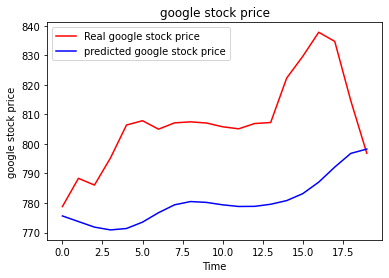

In [63]:
plt.plot(real_stock_price,color = 'red', label = 'Real google stock price')
plt.plot(predicted_stock_price,color = 'blue', label = 'predicted google stock price')
plt.title('google stock price')
plt.xlabel('Time')
plt.ylabel('google stock price')
plt.legend()
plt.show()
